# Assignment 2

## Part1: PyTorch MLP
### Task1: MLP implementation
#### In pytorch_mlp.py and pytorch_train_mlp.py, a multi-layer perceptron is implemented using pytorch. "pytorch_mlp.py" contains the MLP's architecture while the train(method) function includes the training procedure of that mlp.
#### Input "train" function with method of either 'sgd' or 'batch' can choose to run the back propagation in stochastic gradient descent mode or batch gradient descent mode.
### Task2: Train the numpy MLP and the PyTorch MLP with the same data.
#### Part1: In this task, I use stochastic gradient descent to train the models on make_moons data. In the following code section, I split the data generation part and the training part to display the training process explicitly.

In [2]:
from torch.nn import CrossEntropyLoss
from pytorch_mlp import MLP
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import train_mlp_numpy
import pytorch_train_mlp
from tqdm import tqdm
from mlp_numpy import MLP as np_MLP
from pytorch_mlp import MLP as pt_MLP
from modules import CrossEntropy

DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 10

In [3]:
# Data Generation
X, Y = make_moons(1000, random_state=25)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
y_train_one_hot = np.eye(2)[y_train]
y_test_one_hot = np.eye(2)[y_test]

In [8]:
def train_np_sgd(mlp, X_train, X_test, Y_train_one_hot, Y_test_one_hot):
    loss_layer=CrossEntropy()
    test_accu = []
    x_axis =[]
    with tqdm(total=MAX_EPOCHS_DEFAULT) as pbar:
        pbar.set_description('numpy mlp training:')
        for j in range(MAX_EPOCHS_DEFAULT):
            for i in range(len(X_train)):
                predict = mlp.forward(X_train[i])
                dout = loss_layer.backward(predict,Y_train_one_hot[i])
                dx = mlp.backward(dout)

                # update the weight
                mlp.output_layer[0].params['weight'] = mlp.output_layer[0].params['weight'] - LEARNING_RATE_DEFAULT * mlp.output_layer[0].grads['weight']
                mlp.output_layer[0].params['bias'] = mlp.output_layer[0].params['bias'] - LEARNING_RATE_DEFAULT * mlp.output_layer[0].grads['bias']
                for layer in mlp.layers:
                    layer[0].params['weight'] = layer[0].params['weight'] - LEARNING_RATE_DEFAULT * \
                                                           layer[0].grads['weight']
                    layer[0].params['bias'] = layer[0].params['bias'] - LEARNING_RATE_DEFAULT * \
                                                         layer[0].grads['bias']
            if j % EVAL_FREQ_DEFAULT == 0:
                x_axis.append(j)
                plabels = np.empty(Y_test_one_hot.shape)
                for i in range(len(X_test)):
                    eval_predict = mlp.forward(X_test[i])
                    c = train_mlp_numpy.prob_to_class(eval_predict)
                    plabels[i]=c
                # eval_loss = loss_layer.forward(plabels,y_test)
                # eval_losses.append(eval_loss)
                a = train_mlp_numpy.accuracy(plabels,Y_test_one_hot)
                test_accu.append(a)
                pbar.update(EVAL_FREQ_DEFAULT)
    print("np_running_complete")
    return x_axis,test_accu

In [9]:
# stochastic gradient descent not using pytorch's SGD optimizer
def train_pt_sgd(mlp, X_train, X_test, Y_train, Y_test):
    loss_layer = CrossEntropyLoss()
    acc_test=[]
    x_axis=[]
    optimizer = torch.optim.SGD(mlp.parameters(), lr=0.001, momentum=0)
    with tqdm(total=MAX_EPOCHS_DEFAULT) as pbar:
        pbar.set_description('pytorch mlp training:')
        for i in range(0,MAX_EPOCHS_DEFAULT):
            for j in range(len(X_train)):
                xi=np.expand_dims(X_train[j],0)
                yi=torch.tensor([Y_train[j]])
                train_predict = mlp.forward(xi)
                loss = loss_layer(train_predict, yi)
                # print(loss.item())
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if i%EVAL_FREQ_DEFAULT==0:
                with torch.no_grad():
                    mlp.eval()
                    x_axis.append(i)
                    test_predict=mlp.forward(X_test)
                    label_lst = pytorch_train_mlp.prob_to_class(test_predict)
                    acc_test.append(pytorch_train_mlp.accuracy(label_lst,Y_test))
                    pbar.update(EVAL_FREQ_DEFAULT)
                    mlp.train()
    print('pt_running_complete')
    return x_axis, acc_test


In [11]:
n_hidden = DNN_HIDDEN_UNITS_DEFAULT.split(',')
n_hidden = [int(x) for x in n_hidden]
pt_mlp=pt_MLP(2,n_hidden=n_hidden,n_classes=2)
np_mlp =np_MLP(2,n_hidden,2)
x_axis_pt,acc_pt = train_pt_sgd(pt_mlp,x_train,x_test,y_train,y_test)
x_axit_np,acc_np = train_np_sgd(np_mlp,x_train,x_test,y_train_one_hot,y_test_one_hot)

numpy mlp training:: 100%|██████████| 1500/1500 [02:20<00:00, 10.71it/s]


pt_running_complete
np_running_complete


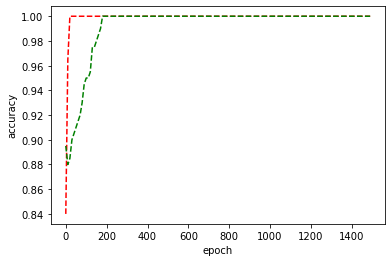

In [12]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.plot(x_axit_np,acc_np,'r--',label='numpy')
plt.plot(x_axis_pt,acc_pt,'g--',label='pytorch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#### Part2: In this task, I use stochastic gradient descent to train the models on make_circles data.

In [4]:
# data generation

from sklearn.datasets import make_circles
X, Y = make_circles(1000, random_state=25)
x_trainc, x_testc, y_trainc, y_testc = train_test_split(X, Y, test_size=0.2, random_state=42)
y_train_one_hotc = np.eye(2)[y_trainc]
y_test_one_hotc = np.eye(2)[y_testc]

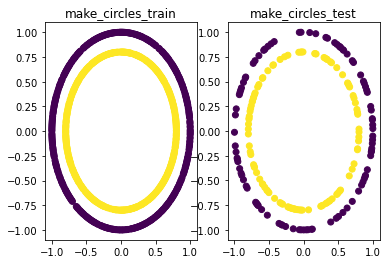

In [7]:
# plot sample points

import matplotlib.pyplot as plt

fig=plt.figure(1)

plt.subplot(121)
plt.title('make_circles_train')
plt.scatter(x_trainc[:,0],x_trainc[:,1],marker='o',c=y_trainc)

plt.subplot(122)
plt.title('make_circles_test')
plt.scatter(x_testc[:,0],x_testc[:,1],marker='o',c=y_testc)
plt.show()

numpy mlp training:: 100%|██████████| 1500/1500 [02:18<00:00, 10.84it/s]


pt_running_complete
np_running_complete


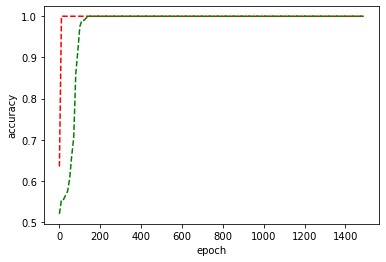

In [10]:
# train on the make_circles dataset
n_hiddenc = DNN_HIDDEN_UNITS_DEFAULT.split(',')
n_hiddenc = [int(x) for x in n_hiddenc]
pt_mlpc=pt_MLP(2,n_hidden=n_hiddenc,n_classes=2)
np_mlpc =np_MLP(2,n_hiddenc,2)
x_axis_ptc,acc_ptc = train_pt_sgd(pt_mlpc,x_trainc,x_testc,y_trainc,y_testc)
x_axit_npc,acc_npc = train_np_sgd(np_mlpc,x_trainc,x_testc,y_train_one_hotc,y_test_one_hotc)

# %matplotlib inline
plt.plot(x_axit_npc,acc_npc,'r--',label='numpy')
plt.plot(x_axis_ptc,acc_ptc,'g--',label='pytorch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### Task 3: Train a network on the classification task on CIFAR10 dataset.
#### The red line in the line chart represents the test error while the green line represents the training error. The bar chart represents the percentage of correctly classified images in each category.

In [1]:
import train_model_CIFAR10 as tmc
import model_CIFAR10 as mc
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def show_accu(x_axis1,y_axis1,x_axis2,y_axis2,x_label,y_label,y1,y2):
    # %matplotlib inline
    plt.plot(x_axis1,y_axis1,'g--',label=y1)
    plt.plot(x_axis2,y_axis2,'r--',label=y2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def show_percentage(classes,percentage):
    plt.barh(range(len(percentage)), percentage,color='rgb',tick_label=classes)
    plt.show()

In [3]:
train_loader, test_loader,classes = tmc.get_cifar10(batch_size=5)

#### CrossEntropyLoss + SGD optimizer

model training:: 100%|██████████| 750000/750000 [08:39<00:00, 1444.66it/s]
<ipython-input-1-14e01e829f9a>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(range(len(percentage)), percentage,color='rgb',tick_label=classes)


Training finish

Accuracy of the network on the 10000 test images: 47 %


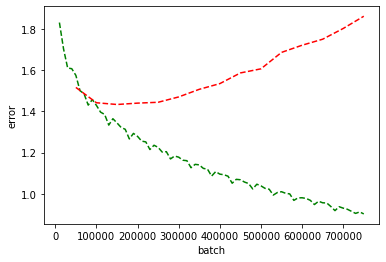

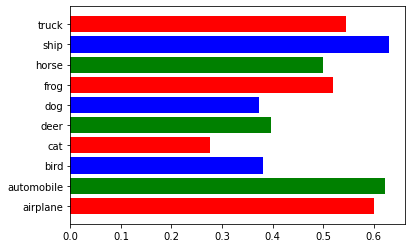

In [4]:
net = mc.MC()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net,train_x_axis,train_loss_lst,x_axis_test,test_loss_lst=tmc.train(model=net,train_set=train_loader,criterion=criterion,optimizer=optimizer,max_epoch=15,validate_batch=2000,test_set=test_loader,batch_size=5)
test_perc=tmc.test(model=net,test_set=test_loader,classes=classes,batch_size=5)
show_accu(train_x_axis,train_loss_lst,x_axis_test,test_loss_lst,"batch","error","train","loss")
show_percentage(classes=classes,percentage=test_perc)

#### Notice that when training too many epochs, the model will overfit (the red test error line goes up and the green train erro line goes down)
#### Using this experiment setting, the lowest test error appears at the second epoch, with the classification accuracy 48%.

model training:: 100%|██████████| 100000/100000 [01:29<00:00, 1112.79it/s]
<ipython-input-7-14e01e829f9a>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(range(len(percentage)), percentage,color='rgb',tick_label=classes)


Training finish

Accuracy of the network on the 10000 test images: 48 %


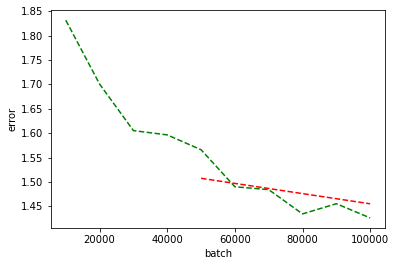

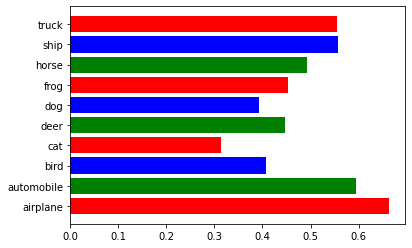

In [10]:
net = mc.MC()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
net,train_x_axis,train_loss_lst,x_axis_test,test_loss_lst=tmc.train(model=net,train_set=train_loader,criterion=criterion,optimizer=optimizer,max_epoch=2,validate_batch=2000,test_set=test_loader,batch_size=5)
test_perc=tmc.test(model=net,test_set=test_loader,classes=classes,batch_size=5)
show_accu(train_x_axis,train_loss_lst,x_axis_test,test_loss_lst,"batch","error","train","loss")
show_percentage(classes=classes,percentage=test_perc)


#### CrossEntropyLoss + Adagrad

model training:: 100%|██████████| 1500000/1500000 [20:57<00:00, 1193.01it/s]
<ipython-input-1-14e01e829f9a>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(range(len(percentage)), percentage,color='rgb',tick_label=classes)


Training finish

Accuracy of the network on the 10000 test images: 49 %


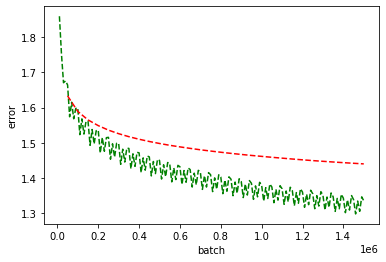

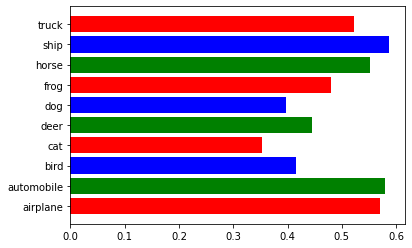

In [11]:
net_adagrad = mc.MC()
optimizer = optim.Adagrad(net_adagrad.parameters(), lr=0.001, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
criterion = nn.CrossEntropyLoss()
net_adagrad,train_x_axis,train_loss_lst,x_axis_test,test_loss_lst=tmc.train(model=net_adagrad,train_set=train_loader,criterion=criterion,optimizer=optimizer,max_epoch=30,validate_batch=2000,test_set=test_loader,batch_size=5)
test_perc=tmc.test(model=net_adagrad,test_set=test_loader,classes=classes,batch_size=5)
show_accu(train_x_axis,train_loss_lst,x_axis_test,test_loss_lst,"batch","error","train","loss")
show_percentage(classes=classes,percentage=test_perc)

model training:: 100%|██████████| 1500000/1500000 [20:25<00:00, 1224.44it/s]
<ipython-input-1-14e01e829f9a>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(range(len(percentage)), percentage,color='rgb',tick_label=classes)


Training finish

Accuracy of the network on the 10000 test images: 50 %


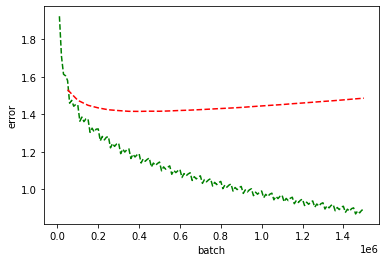

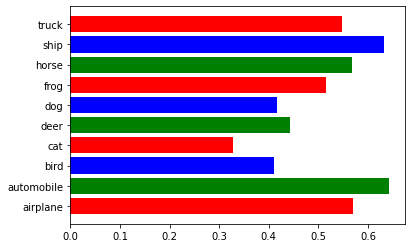

In [12]:
net_adagrad2 = mc.MC()
optimizer = optim.Adagrad(net_adagrad2.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)
criterion = nn.CrossEntropyLoss()
net_adagrad2,train_x_axis,train_loss_lst,x_axis_test,test_loss_lst=tmc.train(model=net_adagrad2,train_set=train_loader,criterion=criterion,optimizer=optimizer,max_epoch=30,validate_batch=2000,test_set=test_loader,batch_size=5)
test_perc=tmc.test(model=net_adagrad2,test_set=test_loader,classes=classes,batch_size=5)
show_accu(train_x_axis,train_loss_lst,x_axis_test,test_loss_lst,"batch","error","train","loss")
show_percentage(classes=classes,percentage=test_perc)

#### After exploration, we observe the following phenomena:
1. The number of training epoch will affect the best accuracy score of this linear training model<br>
If the model is not trained for the enough epochs, it will not reach its best score. <br>
If the model is trained for too many epochs, it will be overfitted and achieve lower score.
2. The learning rate will affect the model's performance
If the learning rate is too large, say the 0.01 in the last experiment done with Adagrad, it will soon reach its lowest test error
and get overfit.
3. The choice of optimizer will affect the model's best achieved performance score.
#### Based on these observations, we can now use the method grid search to tune the hyperparameters
#### Also notice that, we replace the tuning part of regularization to limit the max training epoch times.

In [4]:
batch_size=[4,10]
max_epoch_lst=[5,10,15]
optimizer_lst = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
lr_lst=[0.001,0.005,0.01]
# batch_size=[4]
# max_epoch_lst=[5]
# optimizer_lst = ['sgd']
# lr_lst=[0.001]
criterion=nn.CrossEntropyLoss()
accu_best=0
model_best=None
param_best={}
for bs in batch_size:
    train_loader, test_loader, classes = tmc.get_cifar10(batch_size=bs)
    for epoch in max_epoch_lst:
        for opt in optimizer_lst:
            for lr in lr_lst:
                model = mc.MC()
                model_trained = tmc.train_tune(model=model,train_loader=train_loader,test_loader=test_loader,criterion=criterion,optimizer=opt,lr=lr,max_epoch=epoch,batch_size=bs)
                percentage,accuracy = tmc.test(model_trained,test_loader,classes,batch_size=bs)
                if accuracy > accu_best:
                    accu_best=accuracy
                    model_best=model_trained
                    param_best={'bs':bs,'epoch':epoch,'opt':opt,'lr':lr}
                    print(accu_best)
                    print(param_best)

model training:: 100%|██████████| 750000/750000 [11:31<00:00, 1084.39it/s] 


Training finish

Accuracy of the network on the 10000 test images: 49 %
49.89
{'bs': 4, 'epoch': 5, 'opt': 'SGD', 'lr': 0.001}
Training finish

Accuracy of the network on the 10000 test images: 51 %
51.46
{'bs': 4, 'epoch': 5, 'opt': 'SGD', 'lr': 0.005}
Training finish

Accuracy of the network on the 10000 test images: 49 %
Training finish

Accuracy of the network on the 10000 test images: 44 %
Training finish

Accuracy of the network on the 10000 test images: 10 %
Training finish

Accuracy of the network on the 10000 test images: 10 %
Training finish

Accuracy of the network on the 10000 test images: 46 %
Training finish

Accuracy of the network on the 10000 test images: 49 %
Training finish

Accuracy of the network on the 10000 test images: 50 %
Training finish

Accuracy of the network on the 10000 test images: 47 %
Training finish

Accuracy of the network on the 10000 test images: 17 %
Training finish

Accuracy of the network on the 10000 test images: 10 %
Training finish

Accuracy 

#### The best accuracy I can reach is 52.4% with :
batch size equals 10,<br>
max epoch number equals 10,<br>
the SGD optimizer and the learning rate of 0.05.

In [5]:
print(accu_best)
print(param_best)


52.4
{'bs': 10, 'epoch': 10, 'opt': 'SGD', 'lr': 0.005}
